In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris_dataset.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Drop Sepal length and Sepal Width Column
data.drop(columns=['sepal.length','sepal.width'],axis=1,inplace=True)

In [4]:
data.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [5]:
encoding = {'Virginica':0,'Setosa':1,'Versicolor':2}
data['variety'] = data['variety'].apply(lambda x:encoding[x]) 

In [6]:
# Split the data into train and test
test_indexes = [0,50,100]
test = data.iloc[test_indexes]

In [7]:
train = data.drop(test_indexes,axis=0)
print(train.shape)

(147, 3)


In [8]:
trainX = train['petal.length']
trainY = train['petal.width']

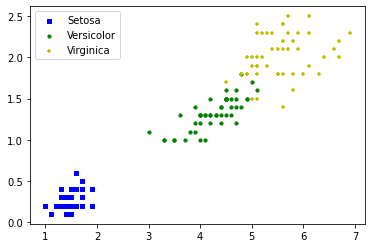

In [9]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(trainX[:49],trainY[:49], s=10, c='b', marker="s",label = 'Setosa')
ax1.scatter(trainX[49:98],trainY[49:98], s=10, c='g', marker="o",label = 'Versicolor')
ax1.scatter(trainX[98:147],trainY[98:147], s=10, c='y', marker="+",label = 'Virginica')
plt.legend(loc='upper left');
plt.savefig('Distribution_Train.png')

## CLASSIFICATION USING EUCLIDEAN DISTANCE

In [10]:
mean_petal_length = []
mean_petal_width = []

In [11]:
for i in range(3):
    data = train[train['variety']==i]
    mean_petal_length.append(np.mean(data['petal.length'].values))
    mean_petal_width.append(np.mean(data['petal.width'].values))

In [12]:
predictions = []
for i in range(0,101,50):
    distance = []
    test_petal_length = test.loc[i]['petal.length']
    test_petal_width = test.loc[i]['petal.width']
    for j in range(len(mean_petal_length)):
        distance.append(np.sqrt( np.square(test_petal_length - mean_petal_length[j])+ np.square(test_petal_width - mean_petal_width[j])))
    print(distance)
    predictions.append(np.argmin(distance,axis=0))

[4.52352819952837, 0.07877656761477059, 3.0647666581467434]
[1.0441583000684491, 3.4359862726693935, 0.4552850368794603]
[0.6655220633655371, 5.065396979895228, 2.107309624274856]


In [13]:
test['Predictions'] = predictions
print(test.head())

     petal.length  petal.width  variety  Predictions
0             1.4          0.2        1            1
50            4.7          1.4        2            2
100           6.0          2.5        0            0


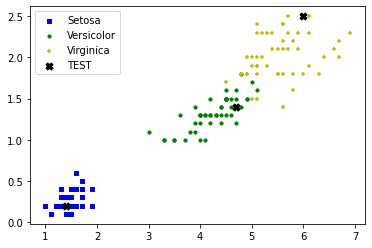

In [14]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(trainX[:49],trainY[:49], s=10, c='b', marker="s",label = 'Setosa')
ax1.scatter(trainX[49:98],trainY[49:98], s=10, c='g', marker="o",label = 'Versicolor')
ax1.scatter(trainX[98:147],trainY[98:147], s=10, c='y', marker="+",label = 'Virginica')
ax1.scatter(test['petal.length'],test['petal.width'], s=50, c='black', marker="X",label = 'TEST')
plt.legend(loc='upper left');
plt.savefig('Distribution_Test_and_Train.png')